<a href="https://colab.research.google.com/github/034adarsh/Stock-Price-Prediction-Using-LSTM/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import datetime as dt
from datetime import date
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import tensorflow as tf

# Define start day to fetch the dataset from the yahoo finance library

---



In [68]:


START = "2020-01-01"
TODAY = date.today().strftime("%Y-%m-%d")

# Define a function to load the dataset

def load_data(ticker):
    data = yf.download(ticker, START, TODAY)
    data.reset_index(inplace=True)
    return data

In [69]:
data = load_data('MRF.NS')
df=data
df.head()

C:\Users\manoj\AppData\Local\Temp\ipykernel_25628\1607218271.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, START, TODAY)
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS
0,2020-01-01,66036.335938,66268.919736,65433.430846,65531.432504,4235
1,2020-01-02,66623.828125,67033.065341,65597.734403,66036.313331,6603
2,2020-01-03,65912.007812,66786.296748,65581.917318,66720.320411,5527
3,2020-01-06,64848.332031,65509.545396,64463.452065,65346.603738,10446
4,2020-01-07,64675.250000,65844.286254,64443.509198,65085.964459,10835


In [70]:
df = df.drop(['Date'], axis = 1)
df.head()

C:\Users\manoj\AppData\Local\Temp\ipykernel_25628\3502562368.py:1: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  df = df.drop(['Date'], axis = 1)


Price,Close,High,Low,Open,Volume
Ticker,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS
0,66036.335938,66268.919736,65433.430846,65531.432504,4235
1,66623.828125,67033.065341,65597.734403,66036.313331,6603
2,65912.007812,66786.296748,65581.917318,66720.320411,5527
3,64848.332031,65509.545396,64463.452065,65346.603738,10446
4,64675.250000,65844.286254,64443.509198,65085.964459,10835


MultiIndex([( 'Close', 'MRF.NS'),
            (  'High', 'MRF.NS'),
            (   'Low', 'MRF.NS'),
            (  'Open', 'MRF.NS'),
            ('Volume', 'MRF.NS')],
           names=['Price', 'Ticker'])


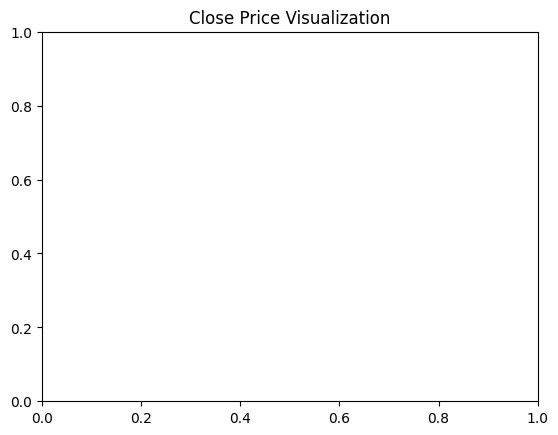

In [71]:
plt.title("Close Price Visualization")
print(df.columns)
#plt.plot(df['Close'])

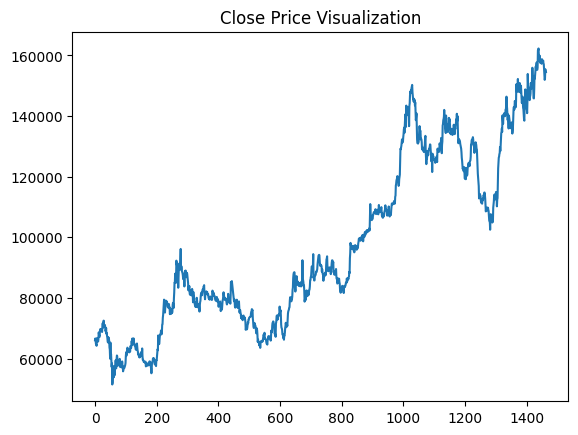

In [72]:
plt.title("Close Price Visualization")
plt.plot(df.Close)

# Plotting moving averages of 100 day

---



In [73]:
ma100 = df.Close.rolling(100).mean()
ma100

Ticker,MRF.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1459,150549.340000
1460,150652.283750
1461,150784.029531
1462,150881.967031


Text(0.5, 1.0, 'Graph Of Moving Averages Of 100 Days')

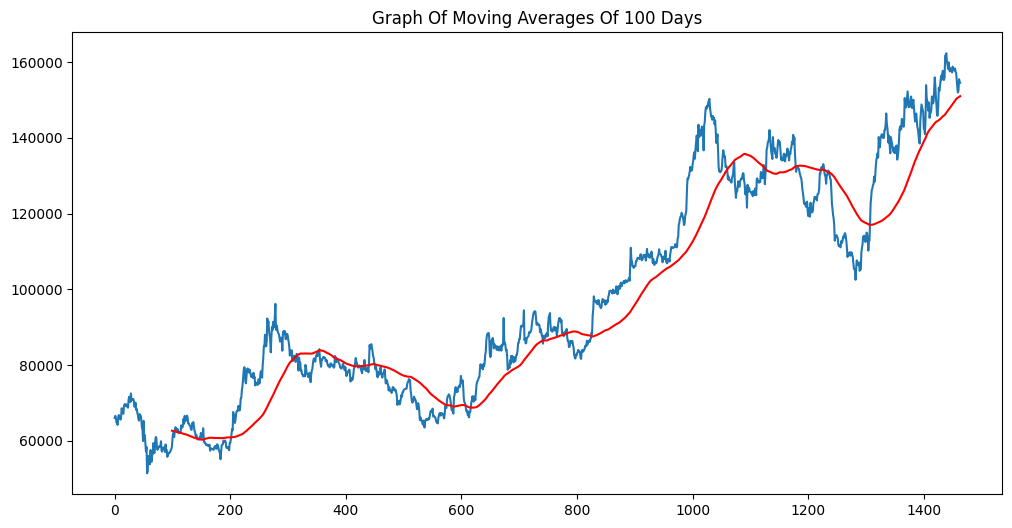

In [74]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.title('Graph Of Moving Averages Of 100 Days')

# Defining 200 days moving averages and plotting comparision graph with 100 days moving averages

---



In [75]:
ma200 = df.Close.rolling(200).mean()
ma200

Ticker,MRF.NS
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1459,137282.403398
1460,137477.306914
1461,137684.559961
1462,137890.385742


Text(0.5, 1.0, 'Comparision Of 100 Days And 200 Days Moving Averages')

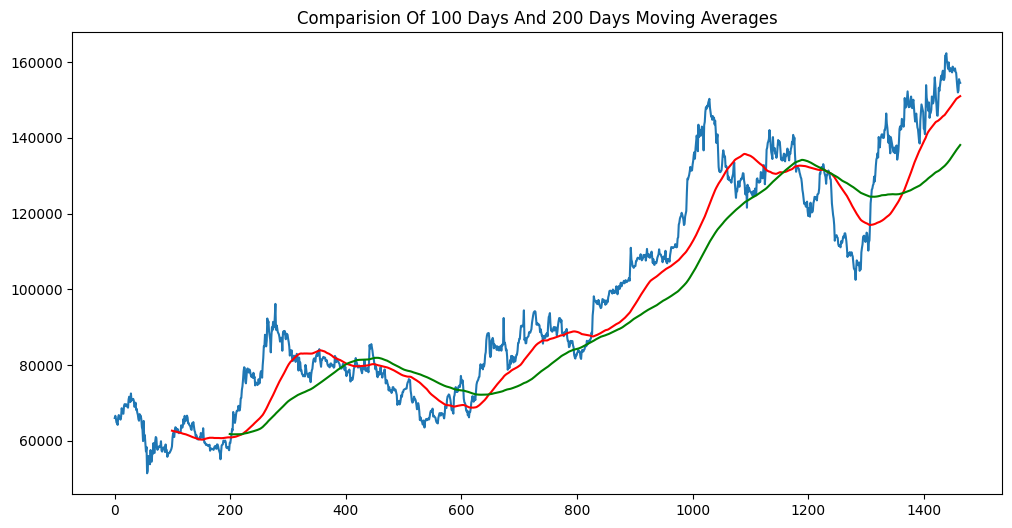

In [76]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
plt.title('Comparision Of 100 Days And 200 Days Moving Averages')

In [77]:
df.shape

(1464, 5)

# Spliting the dataset into training (70%) and testing (30%) set

In [78]:
# Splitting data into training and testing

train = pd.DataFrame(data[0:int(len(data)*0.70)])
test = pd.DataFrame(data[int(len(data)*0.70): int(len(data))])

print(train.shape)
print(test.shape)

(1024, 6)
(440, 6)


In [79]:
train.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS
0,2020-01-01,66036.335938,66268.919736,65433.430846,65531.432504,4235
1,2020-01-02,66623.828125,67033.065341,65597.734403,66036.313331,6603
2,2020-01-03,65912.007812,66786.296748,65581.917318,66720.320411,5527
3,2020-01-06,64848.332031,65509.545396,64463.452065,65346.603738,10446
4,2020-01-07,64675.250000,65844.286254,64443.509198,65085.964459,10835


In [80]:
test.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MRF.NS,MRF.NS,MRF.NS,MRF.NS,MRF.NS
1024,2024-02-16,147606.765625,148748.801497,147053.849032,148397.865987,9418
1025,2024-02-19,148451.984375,149097.681974,147653.110794,148547.803095,11657
1026,2024-02-20,148176.625000,148487.634730,146684.603919,147905.354104,6520
1027,2024-02-21,149236.312500,150341.731933,148253.321073,148253.321073,12528
1028,2024-02-22,149713.390625,150287.161765,148455.727033,148757.770056,7334


# Using MinMax scaler for normalization of the dataset

---



In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [82]:
train_close = train.iloc[:, 4:5].values
test_close = test.iloc[:, 4:5].values

In [83]:
data_training_array = scaler.fit_transform(train_close)
data_training_array

array([[0.16220107],
       [0.16735814],
       [0.17434489],
       ...,
       [0.96743293],
       [0.96028396],
       [1.        ]], shape=(1024, 1))

In [84]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)


(924, 100, 1) (924,)


In [85]:
# Create x_test and y_test exactly like x_train/y_train

# Scale test close prices using the SAME scaler (do NOT fit again)
test_scaled = scaler.transform(test_close)

# Combine last 100 train days with test
last_100_days = data_training_array[-100:]
final_input = np.concatenate((last_100_days, test_scaled), axis=0)

x_test = []
y_test = []

for i in range(100, final_input.shape[0]):
    x_test.append(final_input[i-100:i])
    y_test.append(final_input[i, 0])

x_test = np.array(x_test)
y_test = np.array(y_test)

# Shape must match LSTM: (samples, timesteps, features)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_test shape: (440, 100, 1)
y_test shape: (440,)


In [86]:
x_train.shape

(924, 100, 1)

# ML Model (LSTM)

---



In [87]:
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [88]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True
              ,input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\manoj\OneDrive\Desktop\project\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [89]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

# Training the model

---



In [90]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MAE'])
model.fit(x_train, y_train, validation_data = (x_test, y_test) ,epochs = 25)

Epoch 1/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 23s 486ms/step - MAE: 0.1507 - loss: 0.0422 - val_MAE: 0.1969 - val_loss: 0.0450
Epoch 2/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 381ms/step - MAE: 0.0689 - loss: 0.0082 - val_MAE: 0.3114 - val_loss: 0.1298
Epoch 3/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step - MAE: 0.0646 - loss: 0.0076 - val_MAE: 0.0903 - val_loss: 0.0122
Epoch 4/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 372ms/step - MAE: 0.0581 - loss: 0.0059 - val_MAE: 0.0646 - val_loss: 0.0069
Epoch 5/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 19s 302ms/step - MAE: 0.0544 - loss: 0.0051 - val_MAE: 0.1208 - val_loss: 0.0206
Epoch 6/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 337ms/step - MAE: 0.0526 - loss: 0.0048 - val_MAE: 0.1141 - val_loss: 0.0183
Epoch 7/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 287ms/step - MAE: 0.0550 - loss: 0.0051 - val_MAE: 0.0911 - val_loss: 0.0126
Epoch 8/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 270ms/step - MAE: 0.0503 - loss: 0.0044 - val_MAE: 0.2338 - val_loss: 0.0697
Epoch 9/25
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 299ms/ste

In [91]:
model.save('keras_model.h5')

In [92]:

test_close.shape
test_close

array([[148397.86598685],
       [148547.80309463],
       [147905.35410442],
       [148253.32107294],
       [148757.77005613],
       [149713.41807135],
       [150396.86146796],
       [148452.70927267],
       [147056.92321421],
       [145860.53129144],
       [145642.73173696],
       [145187.53325687],
       [146059.87201157],
       [145142.68403963],
       [145298.12398553],
       [144065.91642956],
       [144209.99651301],
       [141849.25202327],
       [138682.1566782 ],
       [140077.93938083],
       [140875.54323183],
       [136578.47361904],
       [132281.47754705],
       [131625.40176385],
       [131304.37759694],
       [131598.48105458],
       [131603.47433475],
       [132489.80949444],
       [135586.48445586],
       [135890.56897934],
       [136786.84601601],
       [135988.27545056],
       [135282.40102753],
       [134402.03971429],
       [132520.69862446],
       [133098.95732129],
       [132600.47253476],
       [131004.78139964],
       [1281

In [93]:
past_100_days = pd.DataFrame(train_close[-100:])

In [94]:
test_df = pd.DataFrame(test_close)

**Defining the final dataset for testing by including last 100 coloums of the training dataset to get the prediction from the 1st column of the testing dataset.**

---


In [95]:
final_df = pd.concat([past_100_days, test_df], ignore_index=True)

In [96]:
final_df.head()

,0
0,108667.412962
1,108684.963125
2,108168.949635
3,108667.364845
4,108966.499057


In [97]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.10837326],
       [0.1086668 ],
       [0.10003621],
       [0.10837246],
       [0.11337563],
       [0.12037239],
       [0.12691505],
       [0.10380191],
       [0.09419599],
       [0.09586408],
       [0.0800267 ],
       [0.07502443],
       [0.08086028],
       [0.08667986],
       [0.08036031],
       [0.09336652],
       [0.10427139],
       [0.10820825],
       [0.13671995],
       [0.1417222 ],
       [0.11505122],
       [0.11120977],
       [0.1142095 ],
       [0.11337503],
       [0.10337105],
       [0.09635098],
       [0.09488026],
       [0.11670997],
       [0.1000361 ],
       [0.11671389],
       [0.13755041],
       [0.10662258],
       [0.09169897],
       [0.08886432],
       [0.0971266 ],
       [0.09668459],
       [0.1000359 ],
       [0.0966845 ],
       [0.10870667],
       [0.12509762],
       [0.14742553],
       [0.14844267],
       [0.14180767],
       [0.14510762],
       [0.14177275],
       [0.14844262],
       [0.15177833],
       [0.161

In [98]:
input_data.shape

(540, 1)

# Testing the model

---



In [99]:
x_test = []
y_test = []
for i in range(100, input_data.shape[0]):
   x_test.append(input_data[i-100: i])
   y_test.append(input_data[i, 0])

In [100]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(440, 100, 1)
(440,)


# Making prediction and plotting the graph of predicted vs actual values

---



In [101]:
# Making predictions

y_pred = model.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step


In [102]:
y_pred.shape

(440, 1)

In [103]:
y_test

array([0.77288535, 0.77539313, 0.76464784, 0.77046776, 0.77890493,
       0.79488863, 0.80631957, 0.77380263, 0.7504574 , 0.73044713,
       0.72680433, 0.7191909 , 0.73378121, 0.71844077, 0.72104059,
       0.70043129, 0.7028411 , 0.66335644, 0.61038516, 0.63373034,
       0.64707067, 0.57519999, 0.50333053, 0.49235733, 0.48698804,
       0.49190707, 0.49199058, 0.50681499, 0.55860846, 0.56369443,
       0.57868512, 0.56532862, 0.55352251, 0.53879802, 0.50733163,
       0.5170033 , 0.50866589, 0.48197714, 0.43362732, 0.47114582,
       0.44064749, 0.45697259, 0.45030241, 0.44926515, 0.43362716,
       0.45363743, 0.4753152 , 0.47619341, 0.52598249, 0.5303438 ,
       0.44946866, 0.39986795, 0.36716798, 0.39694154, 0.40361177,
       0.41854793, 0.43696223, 0.42528952, 0.41786903, 0.44029725,
       0.41795233, 0.45280368, 0.4499899 , 0.46114134, 0.47198026,
       0.480318  , 0.45030243, 0.42528951, 0.39360659, 0.4402973 ,
       0.40861425, 0.34441457, 0.43362702, 0.3941411 , 0.42860

In [104]:
y_pred

array([[0.6843631 ],
       [0.690385  ],
       [0.6968615 ],
       [0.7039814 ],
       [0.71178055],
       [0.72020614],
       [0.7291956 ],
       [0.7386806 ],
       [0.74838614],
       [0.7578751 ],
       [0.7666229 ],
       [0.77418506],
       [0.7802334 ],
       [0.7846916 ],
       [0.7875563 ],
       [0.788939  ],
       [0.78891635],
       [0.78762734],
       [0.78505147],
       [0.7809278 ],
       [0.775216  ],
       [0.7681216 ],
       [0.7595986 ],
       [0.74928784],
       [0.73693407],
       [0.7225374 ],
       [0.70640457],
       [0.6889734 ],
       [0.6708318 ],
       [0.6528206 ],
       [0.635762  ],
       [0.620378  ],
       [0.60716116],
       [0.59626067],
       [0.58754015],
       [0.5805801 ],
       [0.5749597 ],
       [0.5702609 ],
       [0.56600094],
       [0.56155   ],
       [0.55662787],
       [0.55102384],
       [0.54475296],
       [0.5379281 ],
       [0.5307231 ],
       [0.5232661 ],
       [0.5157863 ],
       [0.508

In [105]:
scaler.scale_

array([1.672551e-05])

In [106]:
scale_factor = 1/0.00985902
y_pred = y_pred * scale_factor
y_test = y_test * scale_factor

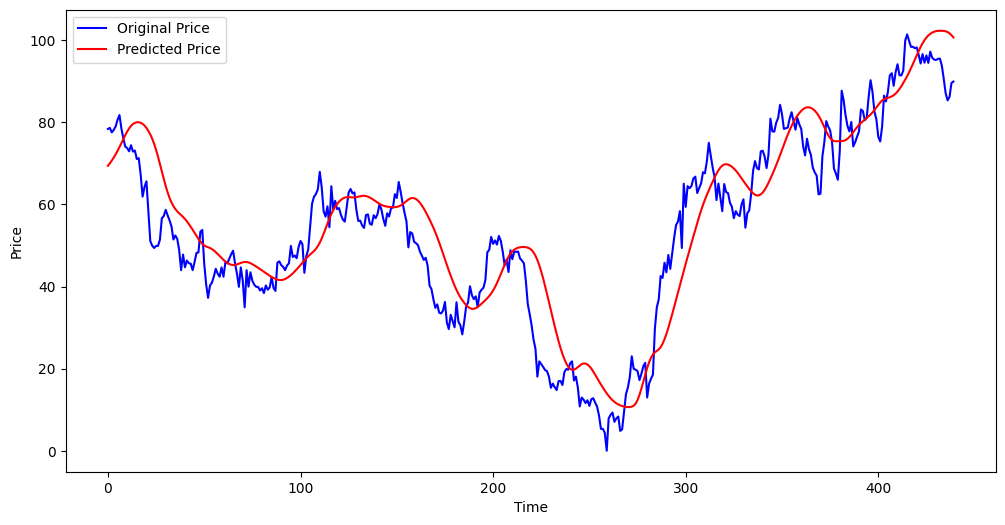

In [107]:
plt.figure(figsize = (12,6))
plt.plot(y_test, 'b', label = "Original Price")
plt.plot(y_pred, 'r', label = "Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Model evaluation

In [108]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error on test set: ", mae)

Mean absolute error on test set:  7.42550603366471
